# 1912년 타이타닉 사고의 생존자를 예측하기
### [ 데이터 설명 ]
- 891명의 승객에 대한 데이터.  생존여부 / 좌석 등급 / 성별 / 나이 / 일행 / 자녀 / 운임 등의 feature

|Feature|	Definition|	Value|
|------|---------|------------|
|survived|	생존 여부|	0 = No, 1 = Yes|
|pclass|	티겟 등급 (1등석, 2등석, 3등석)|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	성별	| male 남성,  female 여성
|age|	나이  |	((숫자))
|sibsp|	함께 탑승한 배우자, 형제자매의 수 합	|   ((숫자))
|parch|	함께 탑승한 부모님, 자녀의 수 합	|   ((숫자))
|fare|	운임 요금 (티켓 가격)	|   ((숫자))
|embarked|	출항지 (한글자)	|C = Cherbourg, Q = Queenstown, S = Southampton|
|class|	티켓 등급 (단어로)	|  First, Second, Third
|who|	남성/여성/아이 구분	|    man, woman, child
|adult_male|	성인 남성인지의 여부	|    True, False
|deck|	선박에서 배정받은 좌석의 구역	|    A, B, C, D, E, F, G, 빈 값
|embark_town|	출항지 (풀네임)	|   ((도시이름))
|alive|	생존 여부	|    yes, no
|alone|	혼자인지 여부	|    True, False

## 라이브러리 임포트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [2]:
# sns 내장 데이터 로딩
titanic_df = sns.load_dataset('titanic')

In [3]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## EDA 탐색적 데이터 분석 수행

In [4]:
# .info() 함수로 데이터 컬럼별 타입(자료형), 값이 있는 행(Non-Null)의 갯수 등을 알 수 있음.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


범주형 컬럼과, 수치형 컬럼으로 나누어서 리스트를 만듬.(추후 분석 시 반복되는 코드를 줄일 수 있음)  
* 범주형(categorical) 데이터는 값이 [1, 2, 3], ["내부", "외부"]와 같이 몇 가지 분류로 한정되는 데이터임.
* 수치형(numerical) 데이터는 값이 1,2,3,5,..., 1.2, 4.51, 3.1415와 같이 숫자 축으로 무한히 위치할 수 있는 데이터임.

In [5]:
# 범주형 데이터 Feature로만 구성된 Dataframe 만들기
categorical_cols = ["sex", "embarked", "class", "who", "adult_male", "deck", "embark_town", "alive", "alone"]
titanic_df[categorical_cols]

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True
887,female,S,First,woman,False,B,Southampton,yes,True
888,female,S,Third,woman,False,NaN,Southampton,no,False
889,male,C,First,man,True,C,Cherbourg,yes,True


In [6]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
#[문제] 수치형 데이터 Feature로만 구성된 Dataframe 만들기

numerical_cols = ["age","sibsp","parch","fare"]
titanic_df[numerical_cols]

,age,sibsp,parch,fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
888,NaN,1,2,23.4500
889,26.0,0,0,30.0000


#### 데이터의 통계량 살펴보기  
.describe() 함수로 각 열에 대한 대략적인 통계 값들을 볼 수 있음.  
(평균, 상위 25/50/75% 값, 최대/최소 값 등)

In [8]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_df['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [10]:
#[문제-해결].value_counts()를 통해 각 컬럼별로 몇 개의 row가 있는지 셀 수 있음.

for col in categorical_cols:    # 반복 배열
  print(col + " 카운트::")
  print(titanic_df.loc[:, col].value_counts())
  print(0)

sex 카운트::
male      577
female    314
Name: sex, dtype: int64
0
embarked 카운트::
S    644
C    168
Q     77
Name: embarked, dtype: int64
0
class 카운트::
Third     491
First     216
Second    184
Name: class, dtype: int64
0
who 카운트::
man      537
woman    271
child     83
Name: who, dtype: int64
0
adult_male 카운트::
True     537
False    354
Name: adult_male, dtype: int64
0
deck 카운트::
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
0
embark_town 카운트::
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
0
alive 카운트::
no     549
yes    342
Name: alive, dtype: int64
0
alone 카운트::
True     537
False    354
Name: alone, dtype: int64
0


In [11]:
#[문제].value_counts()를 통해 각 컬럼별로 몇 개의 row가 있는지 셀 수 있음.


#### 데이터의 분포 시각화

수치형 컬럼들의 분포를 그려보자. 통계량은 boxplot으로 살펴보고, 분포는 histplot으로 그리기
* 반복문을 이용하여 여러개의 차트를 그리기
* plt.subplots를 통해 여러 개의 도화지를 생성함. (nrows × ncols)
* for문 안에서는 각 도화지(ax)에 seaborn으로 차트 그리기 figure는 그림 전체를 의미함.

boxplot 설명  
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

Text(0.5, 1.0, "distribute 'age'")

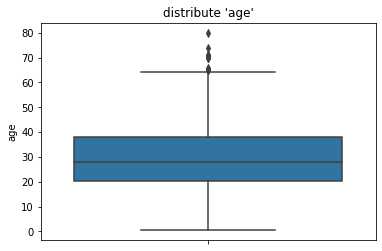

In [12]:
# age 컬럼의 분포 통계량 확인 하기
ax = sns.boxplot(data=titanic_df, y=titanic_df['age'], showfliers=True)
ax.set_title("distribute 'age'")

(4,)


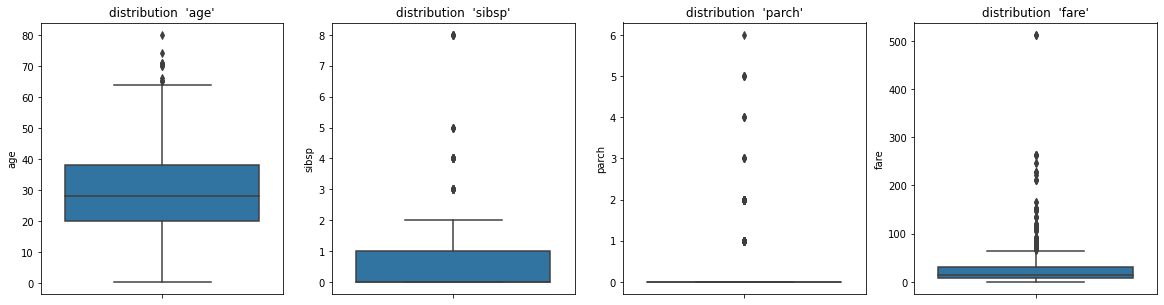

In [13]:
# 수치형 데이터를 하나의 차트에 표현하기, plt.subplots() 활용
figure, ax_list = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(20,5)
print(ax_list.shape)

for i in range(4):
    col = numerical_cols[i]
    sns.boxplot(data=titanic_df, y=col, showfliers=True, ax=ax_list[i])
    ax_list[i].set_title(f"distribution  '{col}'")

(4,)


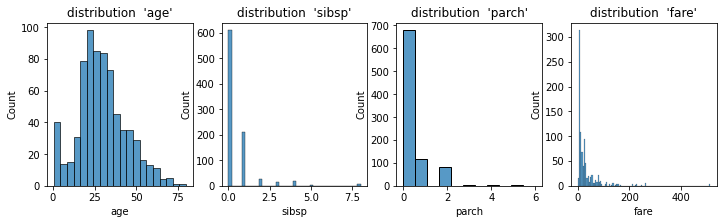

In [14]:
#[문제] sns.histplot()으로, 수치형 데이터의 분포 알아보기

figure, ax_list = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(12,3)
print(ax_list.shape)

for i in range(4):
    col = numerical_cols[i]
    #sns.histplot(data=titanic_df, ax=ax_list[i])
    sns.histplot(data=titanic_df.loc[:, numerical_cols[i]], ax=ax_list[i])
    ax_list[i].set_title(f"distribution  '{col}'")

범주형 컬럼들의 분포 그리기. 범주형이므로 countplot을 통해 각 범주별로 개수를 셀 수 있음.
* 범주형 컬럼이 총 9개 이므로, 3x3 도화지 레이아웃으로 하나씩 그래프를 그려봄.
* ax_list_list는 [[], []] 형태의 2차원 리스트임. for 문으로 반복하기 위해 1차원 리스트로 풀어보기
* 1차원 리스트 ax_list가 9개의 도화지 (ax)를 갖도록 풀어서 할당하는데, `.reshape()` 라는 numpy함수 사용

(3, 3)
(9,)


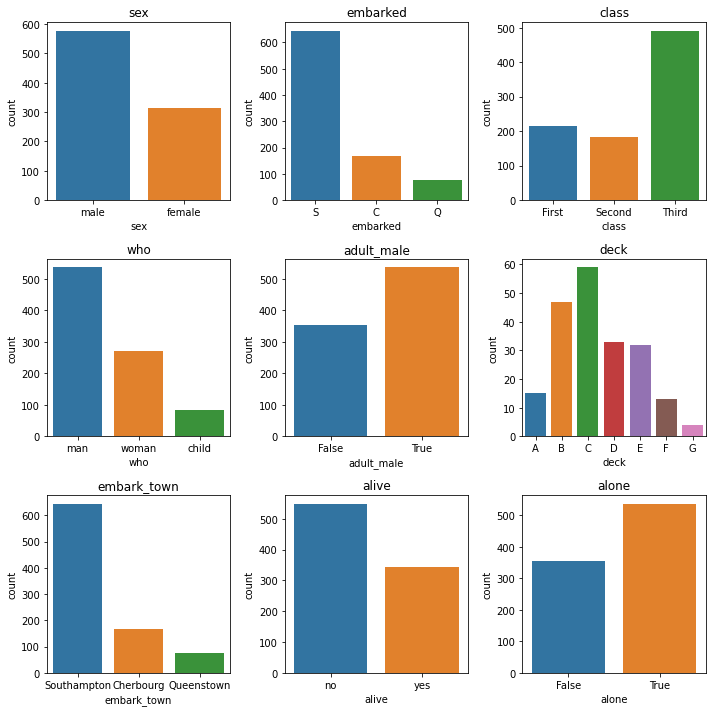

In [15]:
figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(10,10)
ax_list = ax_list_list.reshape(3 * 3)  # 다차원 행렬의 차원을 원하는 모양으로 변경합니다.
print(ax_list_list.shape)
print(ax_list.shape)


for i in range(len(categorical_cols)):
    col = categorical_cols[i]
    g = sns.countplot(data=titanic_df, x=col, ax=ax_list[i])
    g.set_title(col)
    #g.set_xticklabels(g.get_xticklabels(), rotation=45)   # x축 레이블 각도 조절
    
plt.tight_layout()
plt.show()

#### 데이터로부터 유의미한 정보 발굴하기  
여기서부터는 EDA의 범위를 넘어섬. 탑승객의 '생존'에 어떤 것들이 영향을 미칠까?  
몇 가지 가설을 세우고 그래프를 그려 '생존'에 영향을 미치는 요인이 무엇인지 살펴보자.

#### 성별과 생존 여부

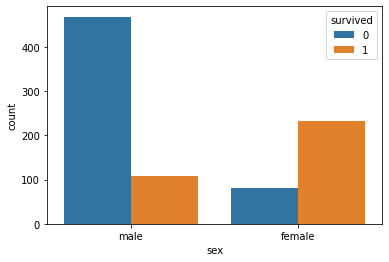

In [16]:
sns.countplot(data=titanic_df, x='sex', hue='survived');

#### 좌석 등급과 생존 여부

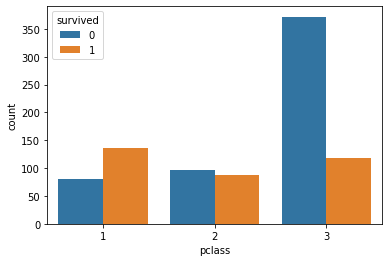

In [17]:
sns.countplot(data=titanic_df, x='pclass', hue='survived');

#### 9개의 범주형 분류에 대해, 생존 여부로 그래프 그리기

(3, 3)
(9,)


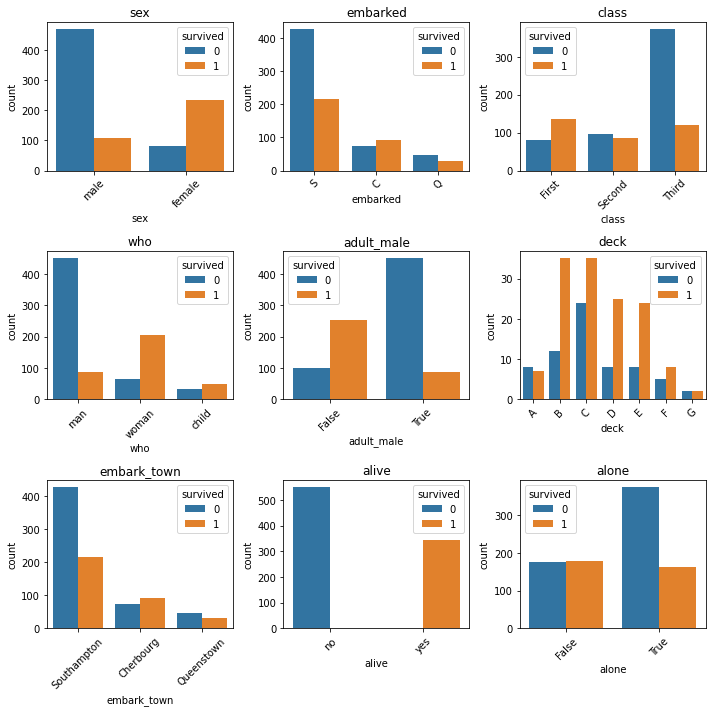

In [18]:
# hue 인자로 'survived' 컬럼을 입력, 각 분류형 데이터 별로 생존/사망 분리하여 살펴보기
figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(10,10)
ax_list = ax_list_list.reshape(3 * 3)  # 다차원 행렬의 차원을 원하는 모양으로 변경합니다.
print(ax_list_list.shape)
print(ax_list.shape)


for i in range(len(categorical_cols)):
    col = categorical_cols[i]
    g = sns.countplot(data=titanic_df, x=col, hue="survived", ax=ax_list[i])
    g.set_title(col)
    g.set_xticklabels(g.get_xticklabels(), rotation=45)   # x축 레이블 각도 조절
    
plt.tight_layout()

- 남성보다 여성의 생존률이 더 높습니다  (남성 > 여성 > 아이)
- 탑승지(embarked)가 C인 경우 생존율이 높습니다
- 1등석 > 2등석 > 3등석 순으로 생존율이 높습니다
- B,D,E 덱 위치의 승객들이 생존율이 높습니다
- 나홀로 승객은 생존율이 낮습니다

##### 생존 여부별로 나이의 히스토그램 그려보기

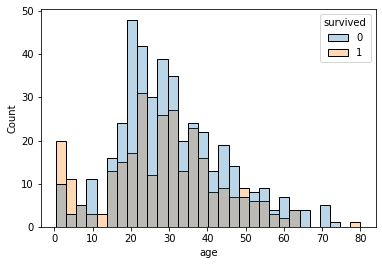

In [19]:
sns.histplot(data=titanic_df, x='age', hue='survived', bins=30, alpha=0.3);

##### 성별과 좌석 등급에 따라, 나이의 boxplot 그려보기

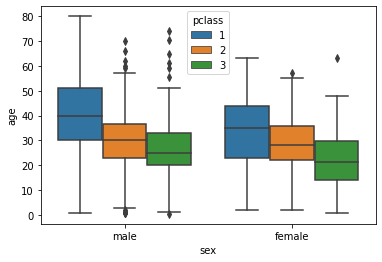

In [20]:
sns.boxplot(data=titanic_df, x='sex', y='age', hue='pclass');

## 머신러닝을 위한 데이터 전처리
- 결측 데이터 처리
- 문자형 데이터를 숫자형 데이터로 변환(레이블 인코딩, 원핫 인코딩)
- 피처스케일링(데이터의 수준을 맞춰주는 것)

### 결측 데이터 처리하기
- 숫자형 데이터, 범주형 데이터를 어떻게 처리할 것인가?

In [21]:
# deck : 선박에서 배정받은 좌석의 구역
# sibsp : 함께 탑승한 형제, 자매, 배우자 수의 합
# parch : 함께 탑승한 부모, 자식 수의 합
# [문제] 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [22]:
# 수치형 데이터의 통계
#[문제]
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
titanic_df[numerical_cols].describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [24]:
# 카테고리형 데이터의 통계
titanic_df[categorical_cols].describe()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


결측치 처리 방법 결정
- age : 평균값으로 채워넣음
- deck : top인 값으로 넣기
- embarkded : top 값으로 넣기

In [25]:
# numerical value, 결측치 평균나이로 채우기
titanic_df['age'].fillna(titanic_df['age'].mean(), inplace=True)

# categorical value : 제일 빈번하게 나타나는 값 채워넣음
titanic_df['deck'].fillna(titanic_df['deck'].describe()['top'], inplace=True)
titanic_df['embarked'].fillna(titanic_df['embarked'].describe()['top'], inplace=True)

In [26]:
# 결측치 채워 졌는지 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 문자 데이터를 어떻게 해야할까?
- 중복된 컬럼이 있는가?
- 머신러닝은 숫자형 데이터 만 입력할 수 있는데 문자형은 어떻게 처리해야할까?

In [27]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [28]:
# drop duplicated columns(중복된 컬럼 삭제)
drop_cols = ["class", "embark_town", "alive"]
titanic_df_clean = titanic_df.drop(drop_cols, axis=1)
titanic_df_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,male,22.000000,1,0,7.2500,S,man,True,C,False
1,1,1,female,38.000000,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.000000,0,0,7.9250,S,woman,False,C,True
3,1,1,female,35.000000,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.000000,0,0,8.0500,S,man,True,C,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,man,True,C,True
887,1,1,female,19.000000,0,0,30.0000,S,woman,False,B,True
888,0,3,female,29.699118,1,2,23.4500,S,woman,False,C,False
889,1,1,male,26.000000,0,0,30.0000,C,man,True,C,True


In [29]:
# string type을 numerical type으로 변형
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
titanic_df_clean['sex'] = le.fit(titanic_df_clean['sex']).transform(titanic_df_clean['sex'])
titanic_df_clean['adult_male'] = le.fit(titanic_df_clean['adult_male']).transform(titanic_df_clean['adult_male'])
titanic_df_clean['alone'] = le.fit(titanic_df_clean['alone']).transform(titanic_df_clean['alone'])
titanic_df_clean['embarked'] = le.fit(titanic_df_clean['embarked']).transform(titanic_df_clean['embarked'])
titanic_df_clean['deck'] = le.fit(titanic_df_clean['deck']).transform(titanic_df_clean['deck'])
titanic_df_clean['who'] = le.fit(titanic_df_clean['who']).transform(titanic_df_clean['who'])

In [30]:
titanic_df_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,1,22.000000,1,0,7.2500,2,1,1,2,0
1,1,1,0,38.000000,1,0,71.2833,0,2,0,2,0
2,1,3,0,26.000000,0,0,7.9250,2,2,0,2,1
3,1,1,0,35.000000,1,0,53.1000,2,2,0,2,0
4,0,3,1,35.000000,0,0,8.0500,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,2,1
887,1,1,0,19.000000,0,0,30.0000,2,2,0,1,1
888,0,3,0,29.699118,1,2,23.4500,2,2,0,2,0
889,1,1,1,26.000000,0,0,30.0000,0,1,1,2,1


In [31]:
titanic_df_clean['age'] = titanic_df_clean['age'].astype(int)
titanic_df_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,1,22,1,0,7.2500,2,1,1,2,0
1,1,1,0,38,1,0,71.2833,0,2,0,2,0
2,1,3,0,26,0,0,7.9250,2,2,0,2,1
3,1,1,0,35,1,0,53.1000,2,2,0,2,0
4,0,3,1,35,0,0,8.0500,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.0000,2,1,1,2,1
887,1,1,0,19,0,0,30.0000,2,2,0,1,1
888,0,3,0,29,1,2,23.4500,2,2,0,2,0
889,1,1,1,26,0,0,30.0000,0,1,1,2,1


## 학습데이터, 테스트 데이터 준비

X_train_feature, X_text_feature, y_train_target, y_test_target = train_test_split(feature_data, target_data)
- test_size : train 데이터와 test 데이터 분할 비율, default 0.25
- shuffle : split을 하기전에 섞을 건지 설정, default=True
- stratify : class 비율을 train과 validation을 일정하게 유지함, 한쪽으로 쏠려서 분배되는 것 방지(stratify=target), default=None
- random_state ; 매번 동일한 데이터 셋으로 분할하는 것을 재현하기 위해 동일한 숫자를 설정함. default=None

In [32]:
X = titanic_df_clean.iloc[:, 1:]
y = titanic_df_clean['survived']

# 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나눕니다. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=10)

## 결정 트리 학습모델 만들기

In [33]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)

print('예측 정확도: %.2f' % accuracy_score(y_test, y_pred))

예측 정확도: 0.75


In [34]:
from sklearn.metrics import classification_report

In [35]:
# Predict를 수행하고 classification_report() 결과 출력하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       110
           1       0.70      0.64      0.67        69

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179

